In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv, qr, det
import nltk
import os
import scipy.cluster.hierarchy as shc

In [2]:
df=pd.read_excel('VAE1817_BSEV_F_Young1.xlsx')
df.head()

,AGE_YRS,NUMDAYS,VAX_DOSE_SERIES,M/F,BIRTHDEF_Y/N,NUM_SYMPS,SYMP_SEV,MEDS_Y/N,CILL_Y/N,HIST_Y/N,...,AR,GM,LA,LG,LL,MO,NS,RA,RL,SEVERITY
0,35.0,18,1,1,0,2,2.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,52.0,3,2,1,0,1,0.000000,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,11.0,52,1,1,0,2,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,16.0,0,1,0,0,3,1.333333,1,1,1,...,0,0,0,0,0,0,0,1,0,1
5,11.0,0,1,0,0,2,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0


df=df.drop('VAERS_ID',axis=1)
df=df.drop('V_ADMINBY',axis=1)
df=df.drop('VAX_TYPE',axis=1)
df=df.drop('VAX_MANU',axis=1)
df=df.drop('VAX_ROUTE',axis=1)
df=df.drop('VAX_SITE',axis=1)
df=df[[c for c in df if c not in ['SEVERITY']] + ['SEVERITY']]

In [3]:
df.head()

,AGE_YRS,NUMDAYS,VAX_DOSE_SERIES,M/F,BIRTHDEF_Y/N,NUM_SYMPS,SYMP_SEV,MEDS_Y/N,CILL_Y/N,HIST_Y/N,...,AR,GM,LA,LG,LL,MO,NS,RA,RL,SEVERITY
0,35.0,18,1,1,0,2,2.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,52.0,3,2,1,0,1,0.000000,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,11.0,52,1,1,0,2,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,16.0,0,1,0,0,3,1.333333,1,1,1,...,0,0,0,0,0,0,0,1,0,1
5,11.0,0,1,0,0,2,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0


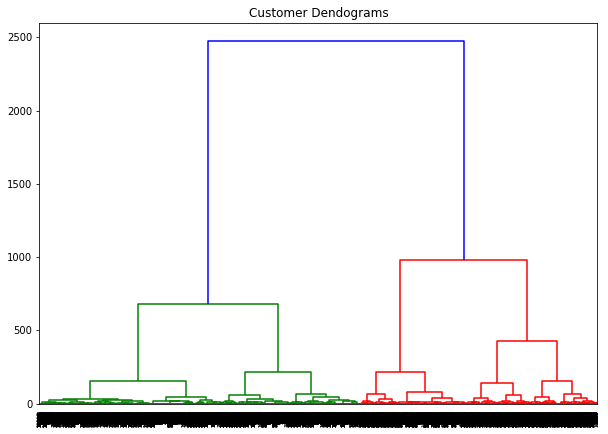

In [4]:
data1 =df.loc[:,['AGE_YRS','M/F','SEVERITY']].values
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data1, method='ward'))  

In [5]:
from sklearn.cluster import AgglomerativeClustering

cluster1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster1.fit_predict(data1)

array([0, 2, 1, ..., 0, 3, 1], dtype=int64)

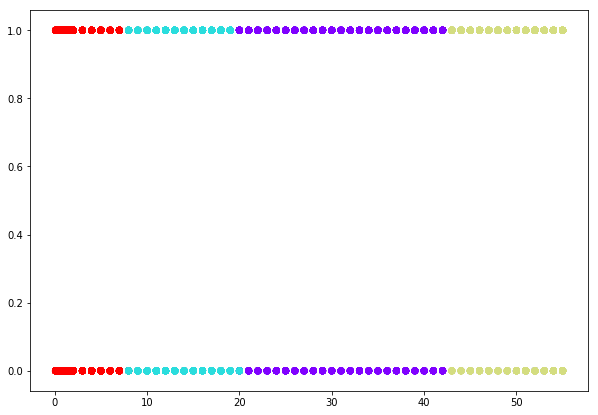

In [6]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1[:,0], data1[:,1], c=cluster1.labels_, cmap='rainbow')

In [7]:
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
    https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
        http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/
            

SyntaxError: invalid syntax (<ipython-input-7-bff4d70fa0b5>, line 1)

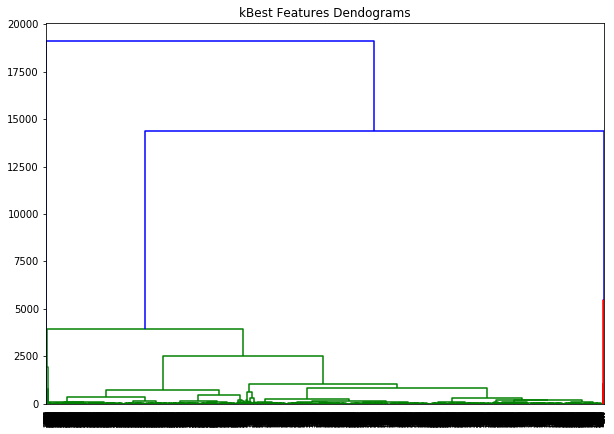

In [8]:
data2 =df.loc[:,['AGE_YRS','NUMDAYS','SYMP_SEV','NUM_SYMPS','SEVERITY']].values
plt.figure(figsize=(10, 7))  
plt.title("kBest Features Dendograms")  
dend = shc.dendrogram(shc.linkage(data2, method='ward'))  

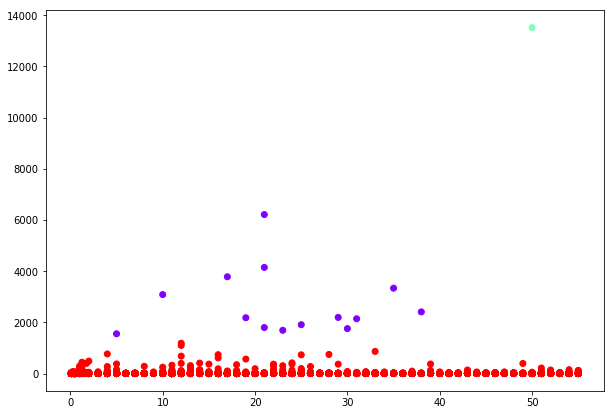

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster2.fit_predict(data2)
plt.figure(figsize=(10, 7))  
plt.scatter(data2[:,0], data2[:,1], c=cluster2.labels_, cmap='rainbow')

In [ ]:
data3 =df.loc[:,['PVAX_Y/N','BIRTHDEF_Y/N','PHM','SCH','SEVERITY']].values
plt.figure(figsize=(10, 7))  
plt.title("RFE Features Dendograms")  
dend = shc.dendrogram(shc.linkage(data3, method='ward'))  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster3.fit_predict(data3)
plt.figure(figsize=(10, 7))  
plt.scatter(data3[:,0], data3[:,1], c=cluster3.labels_, cmap='rainbow')

In [ ]:
data4 =df.loc[:,['AGE_YRS','NUMDAYS','NUM_SYMPS','VAX_DOSE_SERIES','SEVERITY']].values
plt.figure(figsize=(10, 7))  
plt.title("Feature Importance Features Dendograms")  
dend = shc.dendrogram(shc.linkage(data4, method='ward'))  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster4.fit_predict(data4)
plt.figure(figsize=(10, 7))  
plt.scatter(data4[:,0], data4[:,1], c=cluster4.labels_, cmap='rainbow')

In [ ]:
df2=pd.read_excel('VAERS2018_F_NOOUT1.xlsx')
data5 =df2.loc[:,['AGE_YRS','NUMDAYS','NUM_SYMPS','VAX_DOSE_SERIES','SEVERITY']].values
plt.figure(figsize=(10, 7))  
plt.title("Feature Importance Features Dendograms - No Outliers")  
dend = shc.dendrogram(shc.linkage(data4, method='ward'))  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster5.fit_predict(data5)
plt.figure(figsize=(10, 7))  
plt.scatter(data5[:,0], data5[:,1], c=cluster5.labels_, cmap='rainbow')